In [100]:
import pandas as pd


In [101]:
raw = 'https://raw.githubusercontent.com/CodeBlock980/MachineLearningPersonal/refs/heads/main/Predictive%20Modeling/Manufacturing%20Data%20with%20Polynomial%20Regression/manufacturing.csv'
manu_data = pd.read_csv(raw)


In [102]:
manu_data.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


In [103]:
manu_data.isnull().sum()

,0
Temperature (°C),0
Pressure (kPa),0
Temperature x Pressure,0
Material Fusion Metric,0
Material Transformation Metric,0
Quality Rating,0


<Figure size 1000x1000 with 0 Axes>

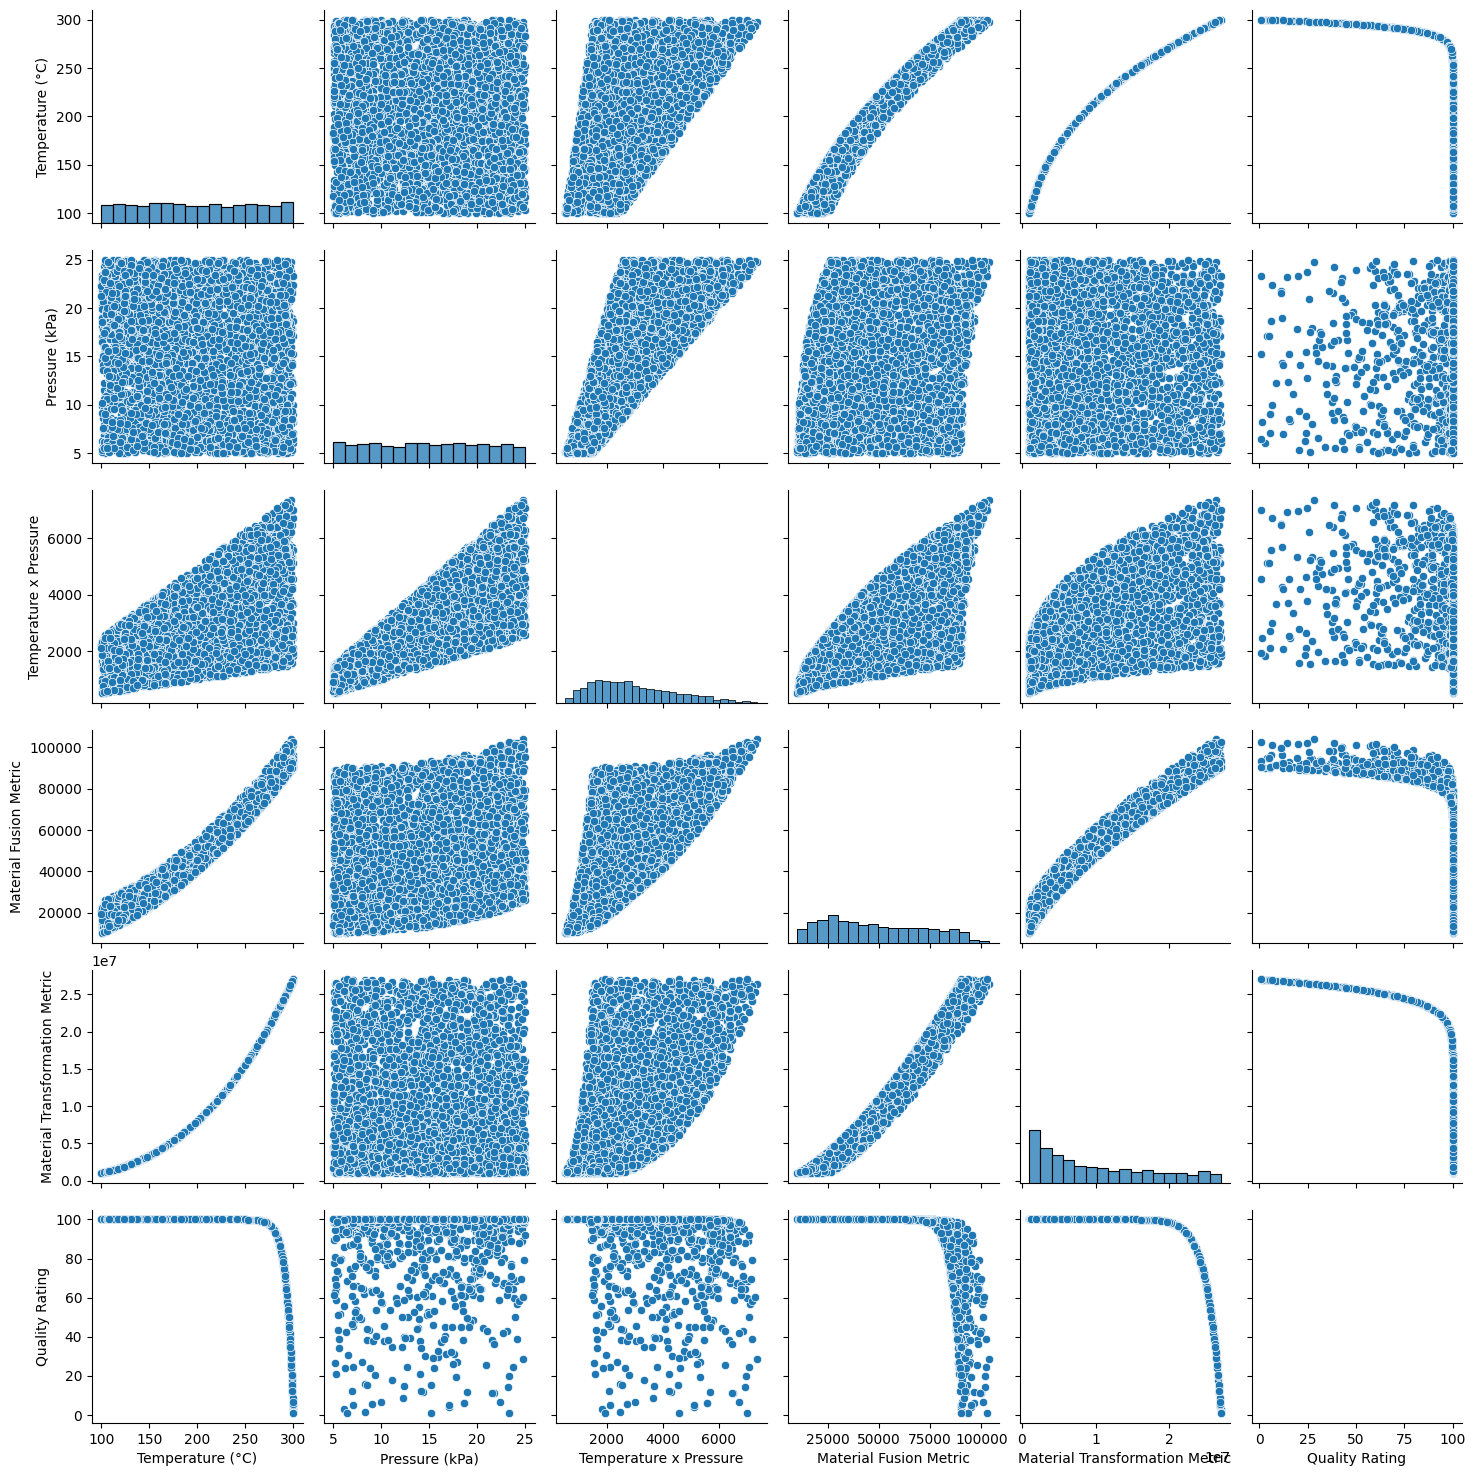

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10,10))
sns.pairplot(manu_data)

In [105]:
manu_data.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

#split data into X and y
X = manu_data.iloc[:, :-1]
y = manu_data.iloc[: -1]


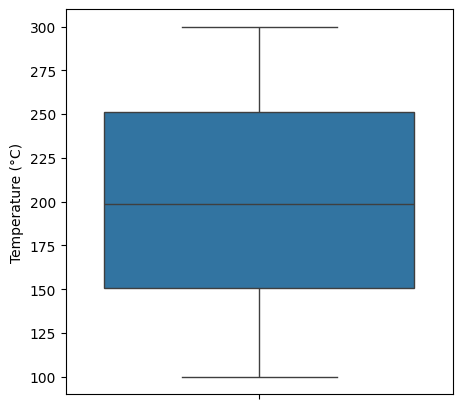

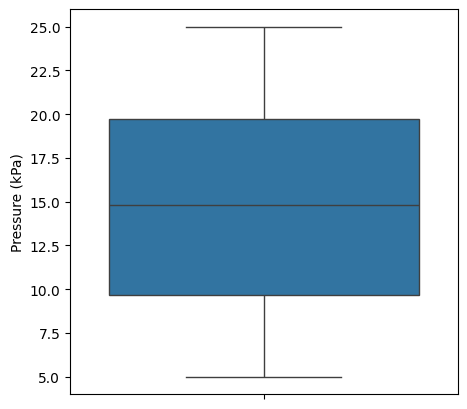

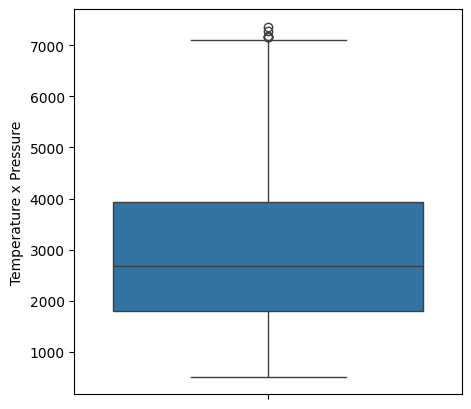

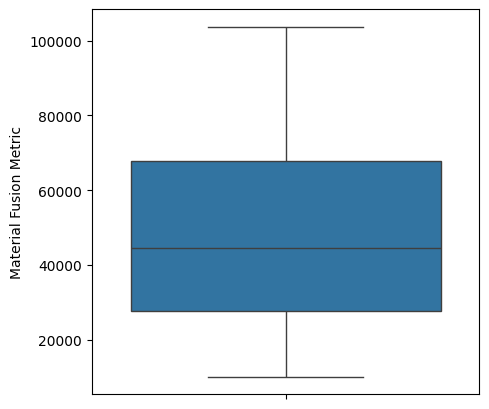

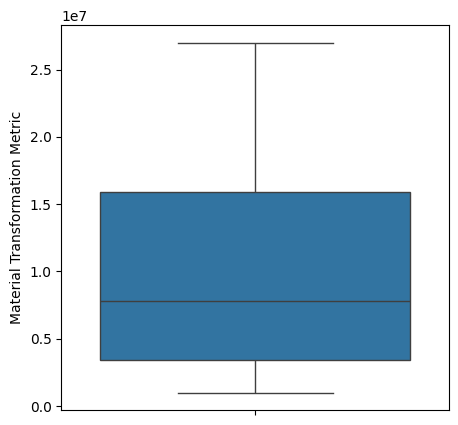

In [107]:
#Create a boxplot for each column

for col in X.columns:
  fig = plt.figure(figsize=(5,5))
  sns.boxplot(y= X[col])
  plt.show()

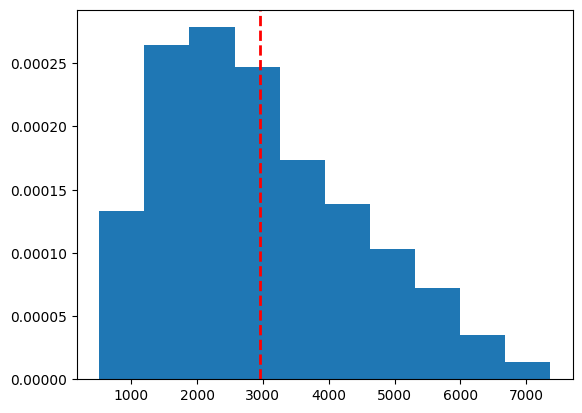

In [108]:
plt.hist(manu_data['Temperature x Pressure'], density=True)
plt.axvline(manu_data['Temperature x Pressure'].mean(), color='red', linestyle='dashed', linewidth=2) #To show where mean lies
plt.show()

***INTERPRETATION***

In the boxplots, we could see that there are outliers found inside the dataset specifically in the columns Temperature X Pressure. By further analyzing these outliers, we visualize its distribution using a histogram which tells us that the data is skewed. Outlier detection techniques such as the Z-score is not applicable with this type of Dataset. Hence we continue instead with the IQR detection.

# **Scaling Data VIA StandardScaler (Standardization)**

In [109]:
#Normalizing and standardizing our data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

standard_data = scaler.fit_transform(manu_data)

In [110]:
#Turn it into a dataframe
manu_data_standard = pd.DataFrame(standard_data, columns=manu_data.columns)
manu_data_standard

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,0.167354,-1.172126,-0.868667,-0.151411,-0.106191,0.287884
1,0.739797,0.172666,0.608769,0.625539,0.568398,0.286786
2,0.352977,-1.208119,-0.840510,0.041949,0.091063,0.287868
3,0.153831,1.554332,1.382277,0.378076,-0.119861,0.287884
4,-0.263275,0.170196,-0.025360,-0.422483,-0.491243,0.287886
...,...,...,...,...,...,...
3952,-0.743581,1.209211,0.317053,-0.553787,-0.813455,0.287886
3953,-0.037577,-1.130394,-0.901761,-0.353322,-0.301605,0.287886
3954,0.710882,0.273136,0.686526,0.610290,0.529470,0.287064
3955,0.154925,1.558464,1.386733,0.380895,-0.118764,0.287884


***INTERPRETATION***

Why did we scale it? Usually in models that assume normality such as linear regression and logistic regression, we do not always need to scale our data. However, it would be good practice to scale the data for faster convergence. Convergence means finding the optimal fit regression line for the data.

# **Deleting Outliers VIA IQR detection**

Going back to the boxplots,we can see outliers in one column named Temperature X Pressure. We dont directly drop these outliers in the dataset, instead we can apply different techniques such as normalization and standardization, (mean, median and mode imputation), delete the outlier.

In [111]:
#Median Imputation in for the outliers
import numpy as np

def impute_outliers(df):
  q1 =df.quantile(0.25)
  q3 = df.quantile(0.75)
  IQR = q3 - q1
  lower_bound = q1 - 1.5 * IQR
  upper_bound = q3 + 1.5 * IQR

  #This returns a series
  df = np.where(df > upper_bound, df.mean(), np.where(df < lower_bound, df.mean(), df))
  return df

#Change the column by the series returned by the function
manu_data['Temperature x Pressure'] = impute_outliers(manu_data)

In [112]:
manu_data['Temperature x Pressure'].describe()

,Temperature x Pressure
count,3957.000000
mean,200.034704
std,58.135717
min,100.014490
25%,150.871296
50%,198.603371
75%,251.366552
max,299.992804


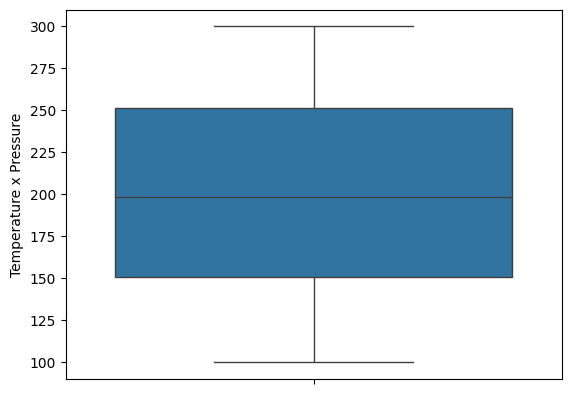

In [113]:
#Plot the boxplot

sns.boxplot(manu_data['Temperature x Pressure'])
plt.show()

In [114]:
manu_data['Temperature x Pressure'].describe()

,Temperature x Pressure
count,3957.000000
mean,200.034704
std,58.135717
min,100.014490
25%,150.871296
50%,198.603371
75%,251.366552
max,299.992804


***INTERPRETATION***

 By using the function we see in our Boxplot that the column does not contain any more outliers. This is because we had impute it based on the mean values of the specific column. Another thing to observe is the distance of the max and min values to the mean which could mean that our data is now somewhat centered around the mean

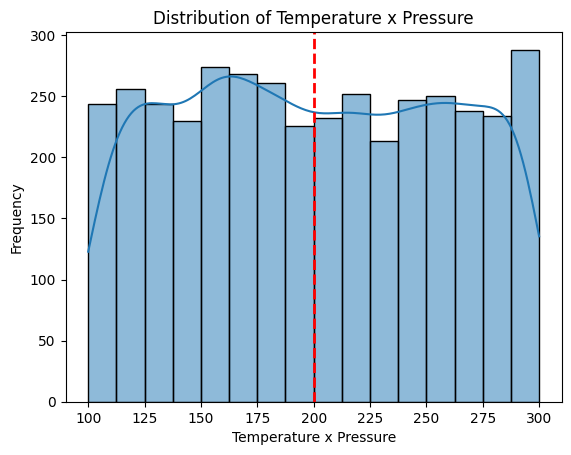

In [115]:
#To better visualize the distribution we can plot it using the histogram plot again

sns.histplot(manu_data['Temperature x Pressure'], kde=True)
plt.axvline(manu_data['Temperature x Pressure'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Temperature x Pressure')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature x Pressure')
plt.show()

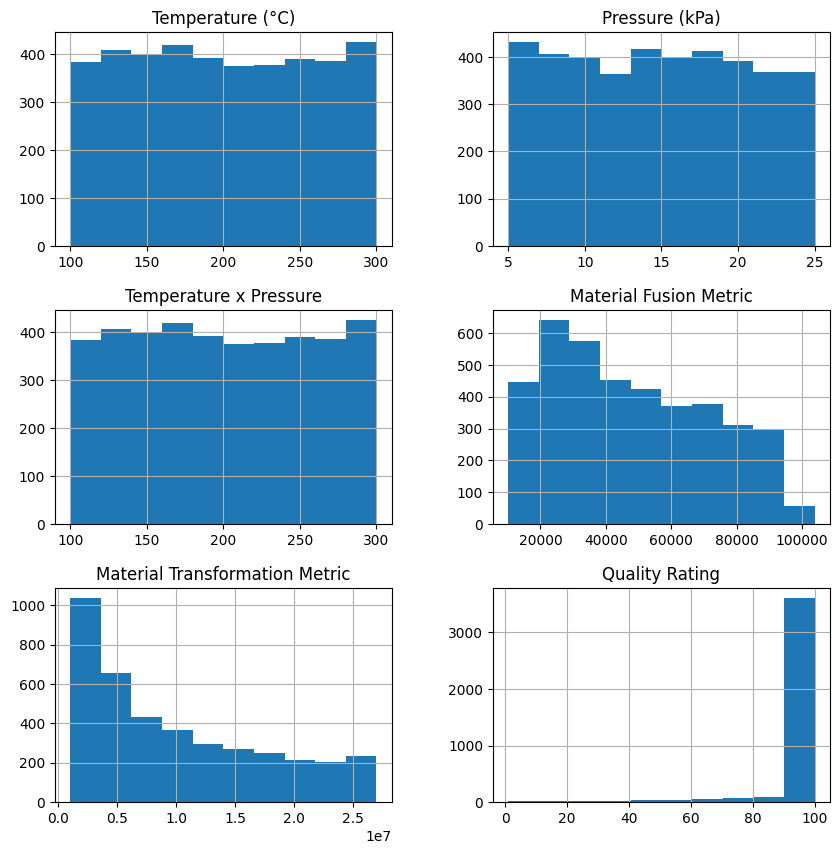

In [116]:
#Distribution Plot
manu_data.hist(figsize=(10,10))
plt.show()

# **Linear and Poly Training**

In [117]:
#Split the data

X = manu_data.iloc[:, :-1]
y= manu_data['Quality Rating']


In [118]:
X.shape

(3957, 5)

In [119]:
y.shape

(3957,)

In [120]:
#Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 31)


In [121]:
#import polynomial features and also linear regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

poly_model = PolynomialFeatures()

linear_model.fit(poly_model.fit_transform(X_train), y_train)

LinearRegression()

In [122]:
#Check for its r2 and other metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
y_pred = linear_model.predict(poly_model.fit_transform(X_test))

print('R2 Score: ', r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))

R2 Score:  0.9320282782611343
MSE:  13.419176611382875
MAE:  2.4914139488866014


***INTERPRETATION***

To interpret, we have evaluated the metrics for the polyfit model. As seen, the R2 Score is 0.93 which indicates that our model is able to explain 93% of the variance of the target variable which means that it is a good fit. In Mean squared error metric, on average the distance between the predicted values and actual values is 13.41 and lastly for the Mean absolute error, on average, our model's predictions is only off by 2.5.